In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np


In [2]:
pip install pystan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00


In [3]:
# Path of dataset
data = "Tesla.csv"
df = pd.read_csv(data)

# Display few rows
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [5]:
# Checking missing values
missing_values = df.isnull().sum()

In [6]:
# Stats Details
statistics = df.describe()
missing_values, statistics

(Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Volume       0
 Adj Close    0
 dtype: int64,
               Open         High          Low        Close        Volume  \
 count  1692.000000  1692.000000  1692.000000  1692.000000  1.692000e+03   
 mean    132.441572   134.769698   129.996223   132.428658  4.270741e+06   
 std      94.309923    95.694914    92.855227    94.313187  4.295971e+06   
 min      16.139999    16.629999    14.980000    15.800000  1.185000e+05   
 25%      30.000000    30.650000    29.215000    29.884999  1.194350e+06   
 50%     156.334999   162.370002   153.150002   158.160004  3.180700e+06   
 75%     220.557495   224.099999   217.119999   220.022503  5.662100e+06   
 max     287.670013   291.420013   280.399994   286.040009  3.716390e+07   
 
          Adj Close  
 count  1692.000000  
 mean    132.428658  
 std      94.313187  
 min      15.800000  
 25%      29.884999  
 50%     158.160004  
 75%     220.022503  
 max     28

The above dataset doesn't have any missing values, so there is no need of data imputation.

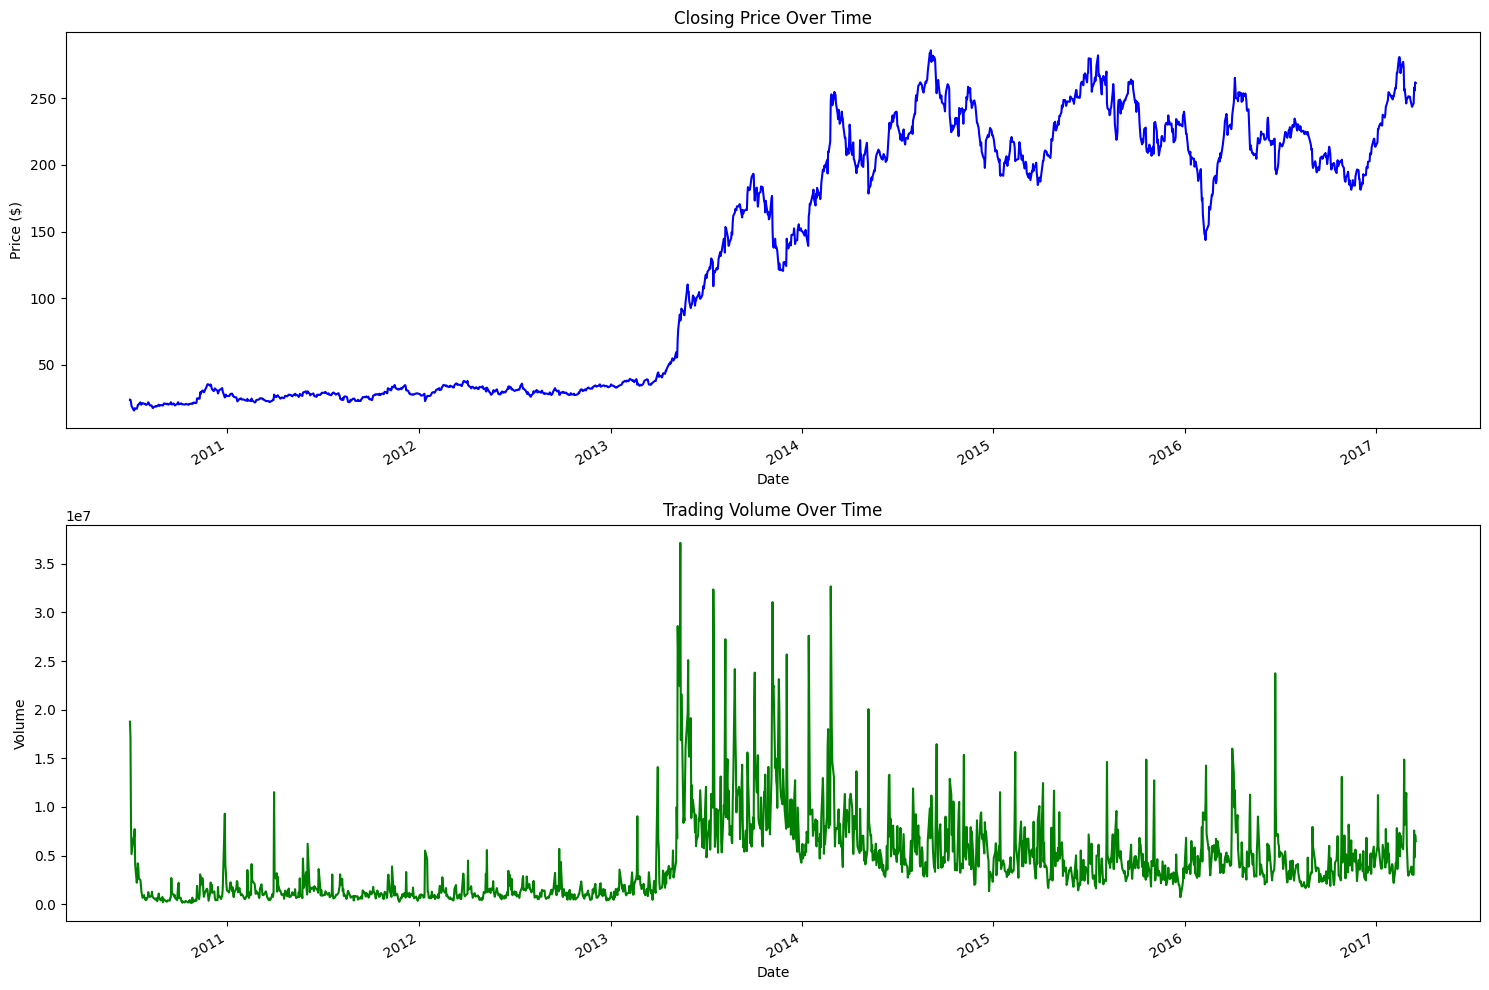

In [7]:
# Visualization - Plotting the closing price over time and the trading volume over time

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

df['Close'].plot(ax=ax[0], color='blue')
ax[0].set_title('Closing Price Over Time')
ax[0].set_ylabel('Price ($)')

df['Volume'].plot(ax=ax[1], color='green')
ax[1].set_title('Trading Volume Over Time')
ax[1].set_ylabel('Volume')

plt.tight_layout()
plt.show()


The above code analyzes Tesla stock data. It converts the 'Date' column to a datetime format and sets it as the dataframe index. Then,creates two plots: one showing the closing price over time, and another showing the trading volume over time to understand trends and patterns in the stock data.

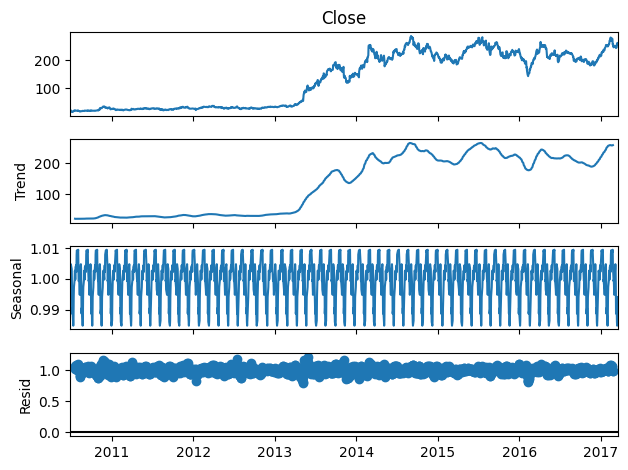

In [8]:
# Seasonality Analysis

decomposition = seasonal_decompose(df['Close'], model = 'multiplicative', period = 30)
fig = decomposition.plot()
plt.show()

The seasonal decomposition of Tesla's closing prices tells the Trend: A general upward movement in price over the years, Seasonal: Minor monthly fluctuations suggest recurring patterns, Residuals: Increased variation over time that indicates unpredictability in the stock price.

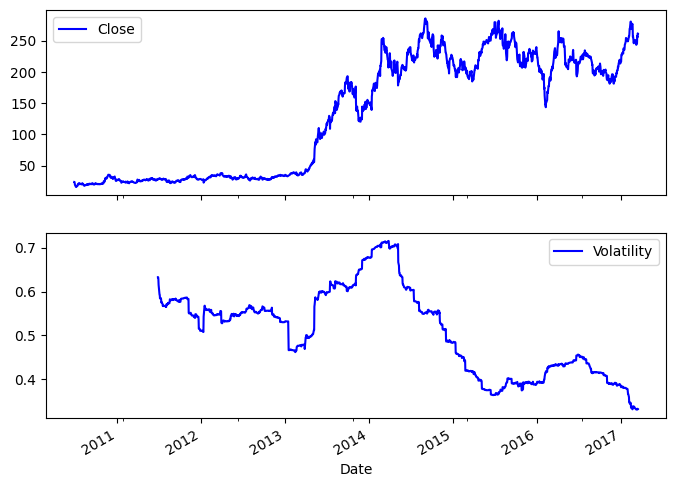

In [9]:
# Volatility Analysis

df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(window=252).std() * np.sqrt(252)
df[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8, 6))
plt.show()

The above code calculates daily stock returns and then plots closing price and calculated volatility to visualize how much the price fluctuates over time.


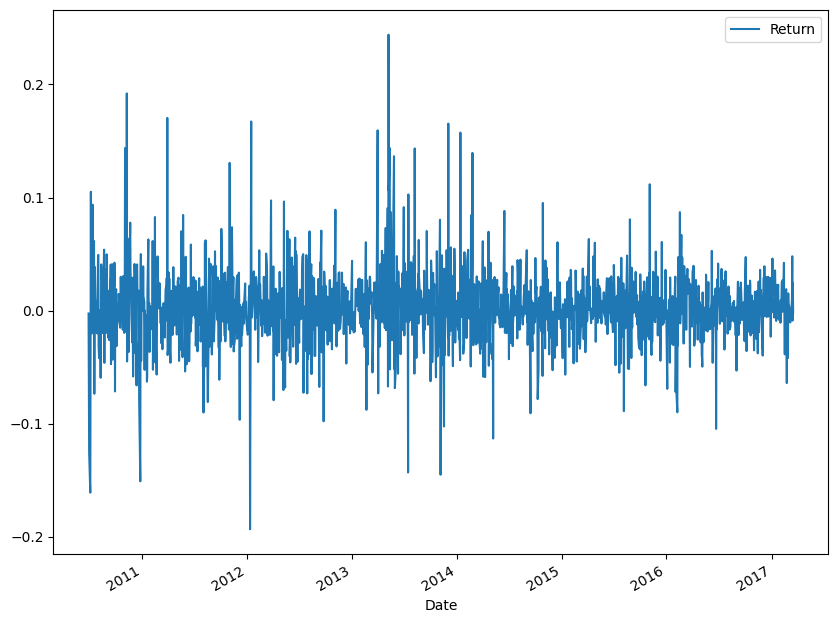

In [10]:
# Return Analysis

df['Return'] = df['Close'].pct_change()
df[['Return']].plot(label='Return', figsize=(10,8))
plt.show()

The return analysis helps us to understand the daily percentage change in Tesla's stock price.

In [12]:
# Preparing data for the Prophet - Forecasting

prophet_df = df.reset_index()[['Date', 'Close']]
prophet_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

prophet_df.head()

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp999q9kav/687pbpfi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp999q9kav/vq_1qmmg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87140', 'data', 'file=/tmp/tmp999q9kav/687pbpfi.json', 'init=/tmp/tmp999q9kav/vq_1qmmg.json', 'output', 'file=/tmp/tmp999q9kav/prophet_model0t9dcc8i/prophet_model-20251004082805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:28:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:28:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


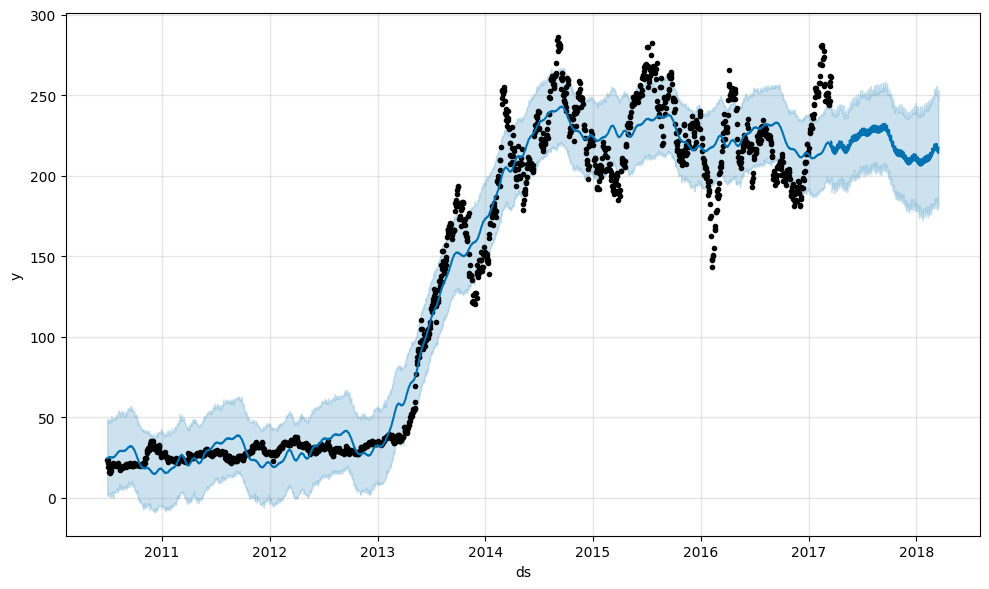

In [13]:
# Initializing, Fitting and using the prophet model for predictions

model = Prophet()

model.fit(prophet_df)

future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

# Visualizing the forecast
model.plot(forecast)
plt.show()

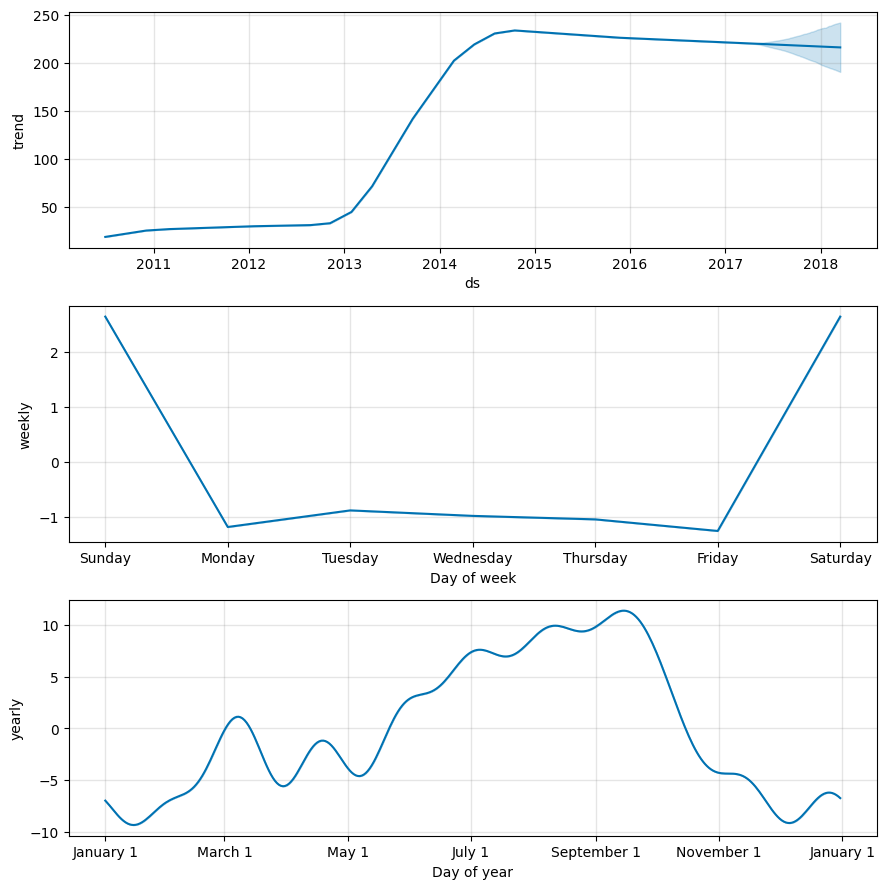

In [14]:
# Components of forecast (visualization)

model.plot_components(forecast)
plt.show()